In [1]:
import pandas as pd
import numpy as np

#immigration data analysis

In [2]:
df=pd.read_excel('Copy of Canada(1).xlsx',sheet_name=1,skiprows=20,skipfooter=2)
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [3]:
cols_to_rename={
    'OdName':'Country',
    'AreaName':'continent',
    'RegNmae':'Region',
    'Devname':'Status'
}
df=df.rename(columns=cols_to_rename)
df.head(2)

,Type,Coverage,Country,AREA,continent,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [15]:
#check no of nuniq values in data 
print("Type unique values",df.Type.nunique())
print("Coverage unique values:",df.Coverage.nunique())

#count unique values in column
print("Coverage unique values count \n",df.Coverage.value_counts())

AttributeError: 'DataFrame' object has no attribute 'Type'

In [8]:
cols_to_drop=['AREA','REG','DEV','Type','Coverage']
df=df.drop(columns=cols_to_drop)
df.head(2)

,Country,continent,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [9]:
df=df.set_index('Country')
df.head(2)

,continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


#make all columns to lower case -optional step

In [16]:
df.columns=[str(name).lower()for name in df.columns.tolist()]
df.head()

,continent,regname,devname,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [17]:
years=list (map(str,range(1990,2014)))
print(years)

['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


## adding a column (total)

In [19]:
df[years].sum(axis=1) # AXIS=1 FOR ROW WISE SUM , DEAFULT IS 0 (COLUMN WISE SUM) 

Country
Afghanistan       54946
Albania           15690
Algeria           68168
American Samoa        3
Andorra              13
                  ...  
Viet Nam          66508
Western Sahara        2
Yemen              2913
Zambia             1456
Zimbabwe           7808
Length: 195, dtype: int64

In [21]:
df['total']=df[years].sum(axis=1)
df.head()

,continent,regname,devname,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,54946
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15690
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,68168
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,13


## VISUALIZATION

In [22]:
df.isnull().sum()

continent    0
regname      0
devname      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
total        0
dtype: int64

<Axes: >

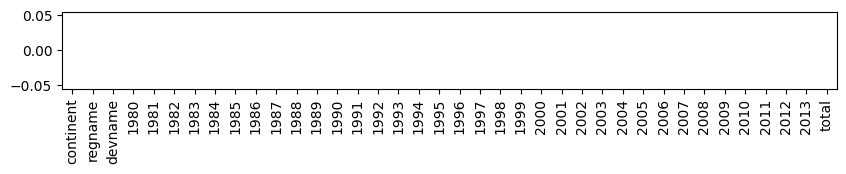

In [23]:
df.isnull().sum().plot(figsize=(10,1),kind="bar")

## total immigration visualization

<Axes: title={'center': 'total immigration'}, xlabel='Country'>

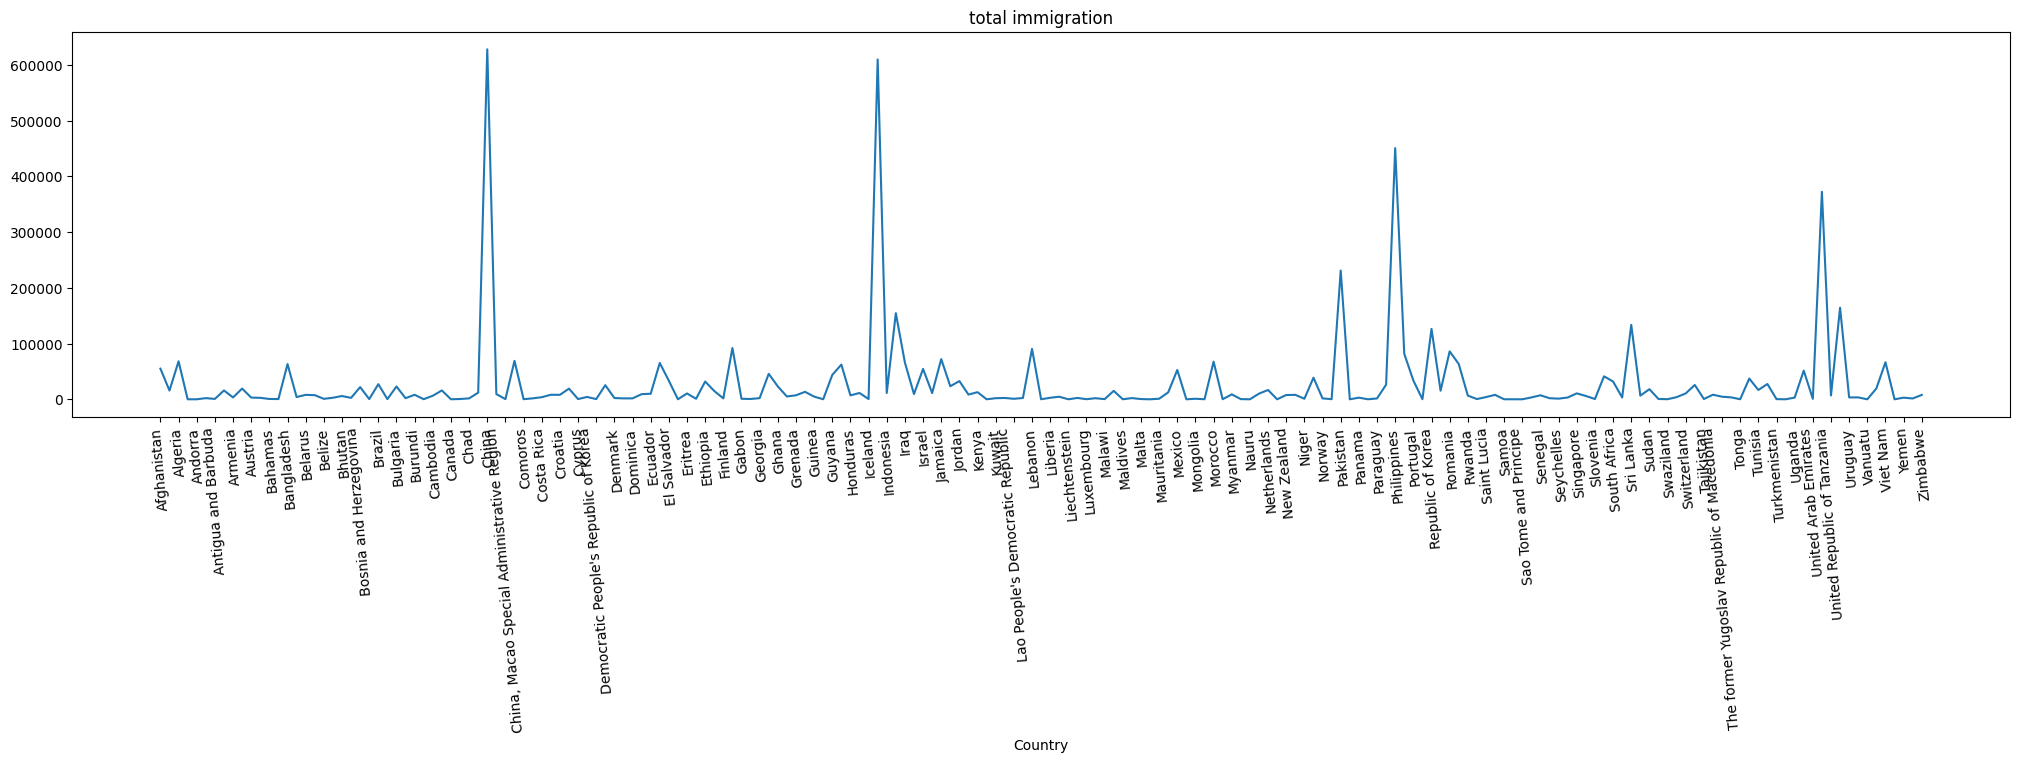

In [28]:
df.total.plot(rot=95 , 
              figsize=(25,5),
              xticks=range(0,df.shape[0],2),
              title='total immigration')

<Axes: title={'center': 'top 25 countries with highest immigration'}, xlabel='country', ylabel='immigration'>

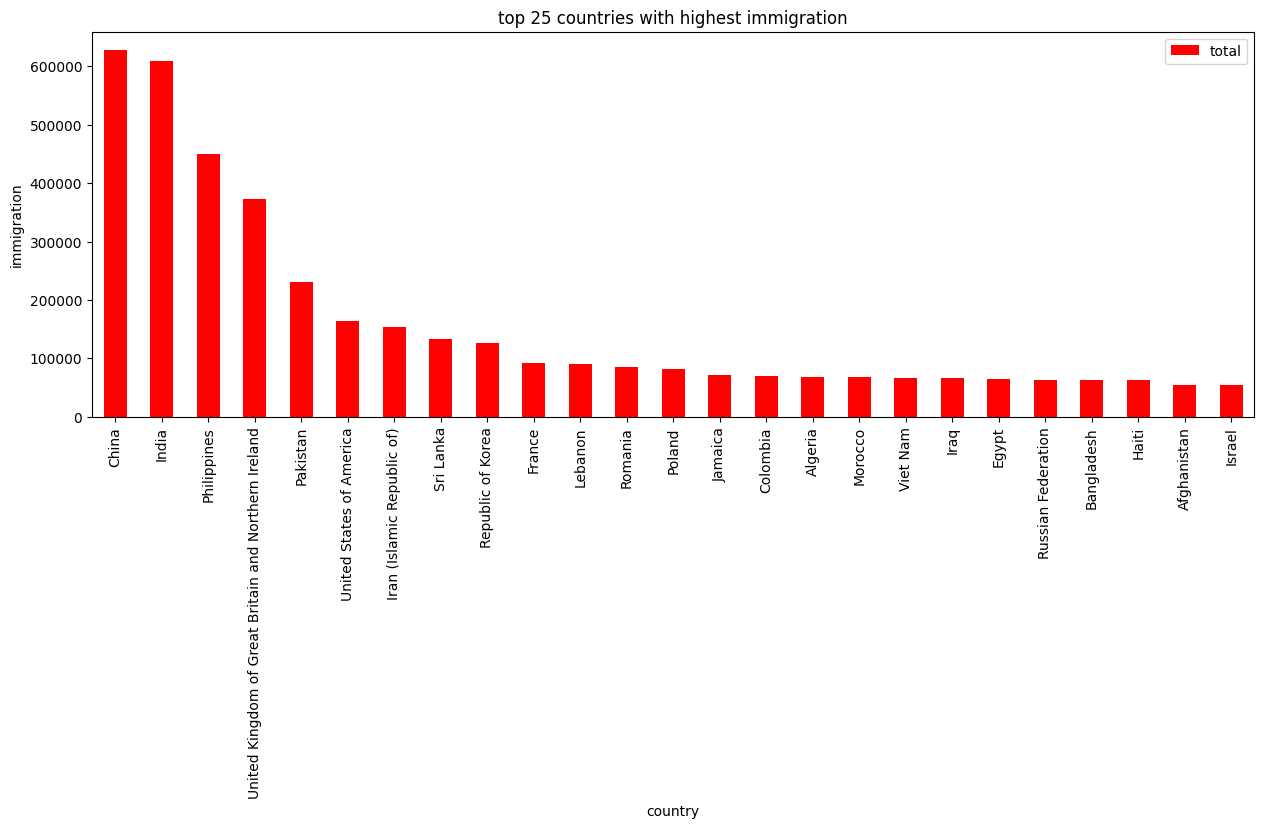

In [41]:
# top 25 countries with highest immigration 
df.sort_values('total',ascending=False).head(25).plot(
    kind='bar',y='total'
    ,figsize=(15,5),
    title='top 25 countries with highest immigration',
    color='red',
    alpha=1,
    xlabel='country',
    ylabel='immigration',
)                                                